In [53]:
# importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [54]:
# importing the necessary libraries
data = pd.read_csv('Fraud_check.csv')

In [55]:
#EDA
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [56]:
data.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [57]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [58]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


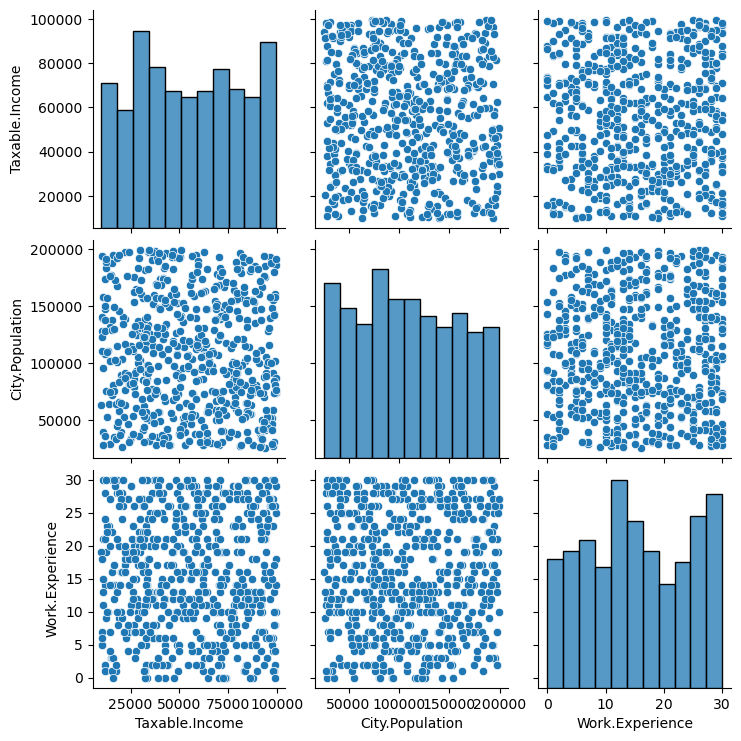

In [59]:
import seaborn as sns
sns.pairplot(data)

In [60]:
categorical_features = data.describe(include=["object"]).columns
categorical_features

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')

In [61]:
numerical_features = data.describe(include=["int64"]).columns
numerical_features

Index(['Taxable.Income', 'City.Population', 'Work.Experience'], dtype='object')

In [62]:
data['income'] = data['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')


In [63]:
data1 = data.drop(['Taxable.Income'], axis=1)


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


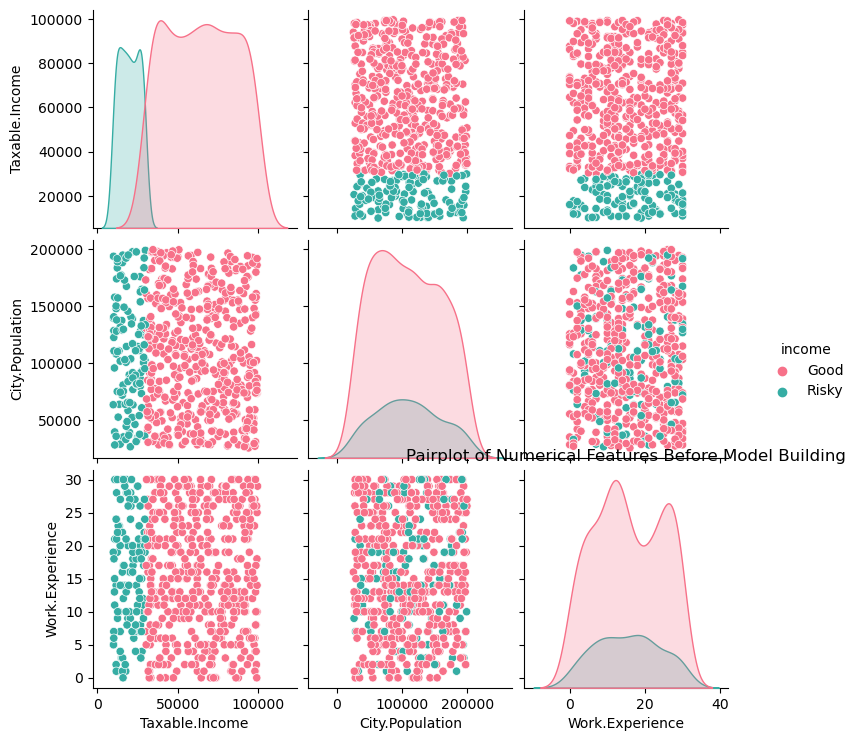

In [64]:
# Pairplot for numerical features
sns.pairplot(data, hue='income', palette='husl', diag_kind='kde')
plt.title('Pairplot of Numerical Features Before Model Building')
plt.show()


In [65]:
le = preprocessing.LabelEncoder()
categorical_features = data1.select_dtypes(include=["object"]).columns
for col in categorical_features:
    data1[col] = le.fit_transform(data1[col])

In [66]:
X = data1.drop(['income'], axis=1)
y = data1['income']

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)


In [69]:
rf_model.fit(x_train, y_train)


RandomForestClassifier(n_estimators=150, random_state=42)

In [70]:
test_predictions = rf_model.predict(x_test)
train_predictions = rf_model.predict(x_train)


In [71]:
print(np.mean(y_test==test_predictions))


0.75


In [72]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model on the training set
print("Training Set Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_train, train_predictions))
print("Classification Report:\n", classification_report(y_train, train_predictions))

# Evaluate the model on the test set
print("\nTest Set Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, test_predictions))
print("Classification Report:\n", classification_report(y_test, test_predictions))

Training Set Performance:
Confusion Matrix:
 [[382   0]
 [  0  98]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       382
           1       1.00      1.00      1.00        98

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480


Test Set Performance:
Confusion Matrix:
 [[90  4]
 [26  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.96      0.86        94
           1       0.00      0.00      0.00        26

    accuracy                           0.75       120
   macro avg       0.39      0.48      0.43       120
weighted avg       0.61      0.75      0.67       120



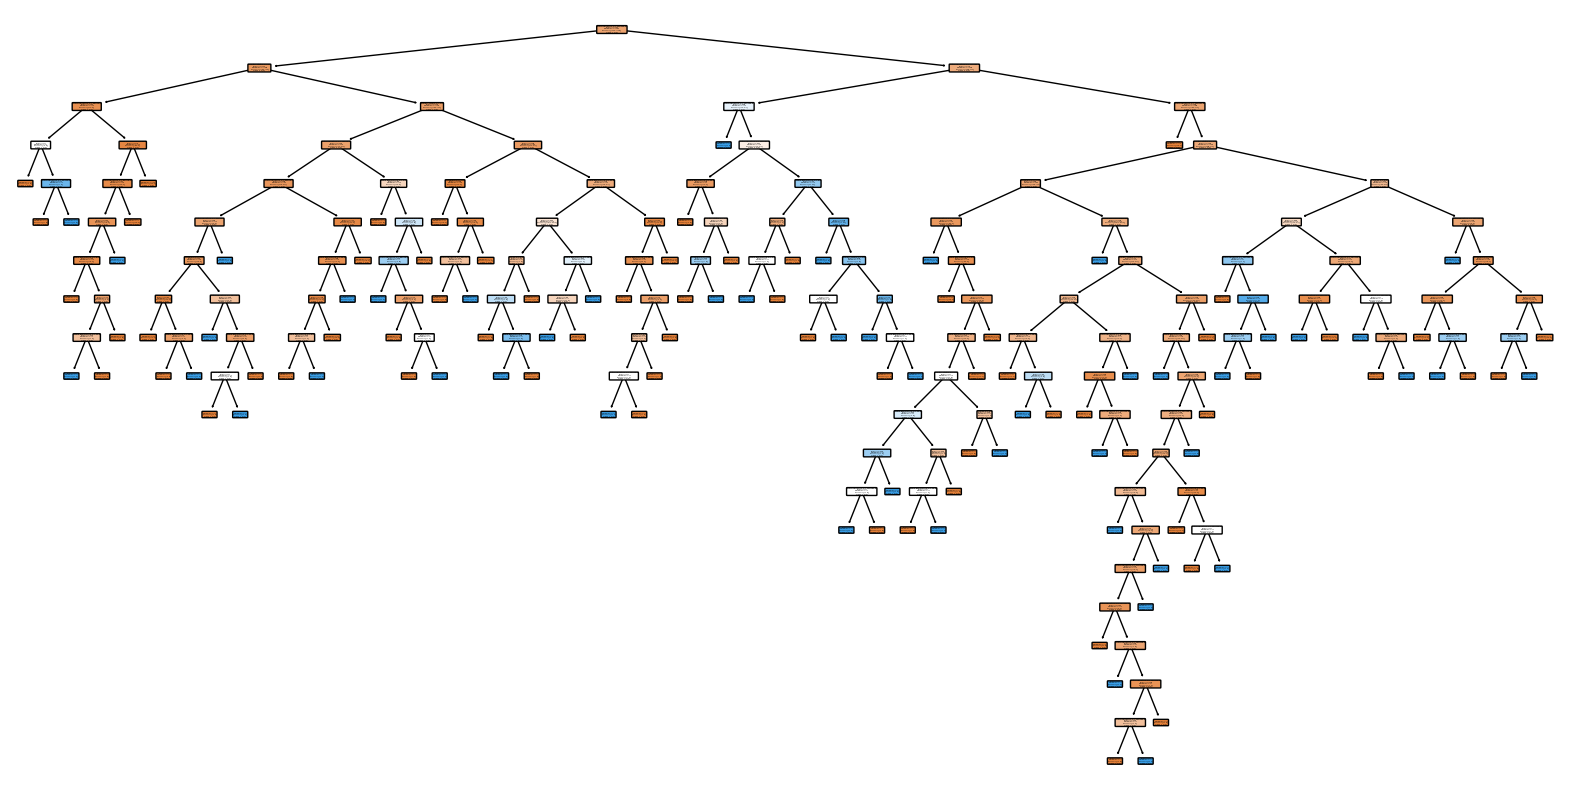

In [91]:
from sklearn.tree import plot_tree

feature_names = x_train.columns

plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=feature_names, filled=True, rounded=True, class_names=True)
plt.show()


In [73]:
# GridSearchCV for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [74]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=150,
                                              random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy')

In [75]:
best_params = grid_search.best_params_

In [76]:
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(x_train, y_train)


RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [77]:
test_predictions = best_rf_model.predict(x_test)

In [78]:
print("Best Random Forest Model Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, test_predictions))
print("Classification Report:\n", classification_report(y_test, test_predictions))

Best Random Forest Model Performance:
Confusion Matrix:
 [[94  0]
 [26  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88        94
           1       0.00      0.00      0.00        26

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.61      0.78      0.69       120



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [79]:
# K-Fold Cross-Validation
cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores: [0.8        0.79166667 0.78333333 0.79166667 0.775     ]
Mean Accuracy: 0.7883333333333333


In [80]:
best_rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
bagging_model = BaggingClassifier( n_estimators=50, random_state=42)
bagging_model.fit(x_train, y_train)

BaggingClassifier(n_estimators=50, random_state=42)

In [81]:
# Predictions on the test set using Bagging
bagging_predictions = bagging_model.predict(x_test)
print("\nBagging Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, bagging_predictions))
print("Classification Report:\n", classification_report(y_test, bagging_predictions))


Bagging Performance:
Confusion Matrix:
 [[90  4]
 [24  2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.96      0.87        94
           1       0.33      0.08      0.12        26

    accuracy                           0.77       120
   macro avg       0.56      0.52      0.50       120
weighted avg       0.69      0.77      0.70       120



In [82]:
# AdaBoost
adaboost_model = AdaBoostClassifier( n_estimators=50, random_state=42)
adaboost_model.fit(x_train, y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

In [83]:
# Predictions on the test set using AdaBoost
adaboost_predictions = adaboost_model.predict(x_test)
print("\nAdaBoost Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, adaboost_predictions))
print("Classification Report:\n", classification_report(y_test, adaboost_predictions, zero_division=1))



AdaBoost Performance:
Confusion Matrix:
 [[94  0]
 [26  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88        94
           1       1.00      0.00      0.00        26

    accuracy                           0.78       120
   macro avg       0.89      0.50      0.44       120
weighted avg       0.83      0.78      0.69       120



In [84]:
# XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [85]:
# Predictions on the test set using XGBoost
xgb_predictions = xgb_model.predict(x_test)
print("\nXGBoost Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_predictions))
print("Classification Report:\n", classification_report(y_test, xgb_predictions))



XGBoost Performance:
Confusion Matrix:
 [[85  9]
 [26  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83        94
           1       0.00      0.00      0.00        26

    accuracy                           0.71       120
   macro avg       0.38      0.45      0.41       120
weighted avg       0.60      0.71      0.65       120



In [86]:
# LGBM
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(x_train, y_train)



[LightGBM] [Info] Number of positive: 98, number of negative: 382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.204167 -> initscore=-1.360453
[LightGBM] [Info] Start training from score -1.360453
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

LGBMClassifier(random_state=42)

In [87]:
# Predictions on the test set using LGBM
lgbm_predictions = lgbm_model.predict(x_test)
print("\nLightGBM Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, lgbm_predictions))
print("Classification Report:\n", classification_report(y_test, lgbm_predictions))


LightGBM Performance:
Confusion Matrix:
 [[85  9]
 [26  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83        94
           1       0.00      0.00      0.00        26

    accuracy                           0.71       120
   macro avg       0.38      0.45      0.41       120
weighted avg       0.60      0.71      0.65       120



In [88]:
# Model Accuracy Visualization
model_names = ['Random Forest', 'Bagging', 'AdaBoost', 'XGBoost', 'LightGBM']
models = [rf_model, bagging_model, adaboost_model, xgb_model, lgbm_model]

Random Forest Accuracy: 0.75


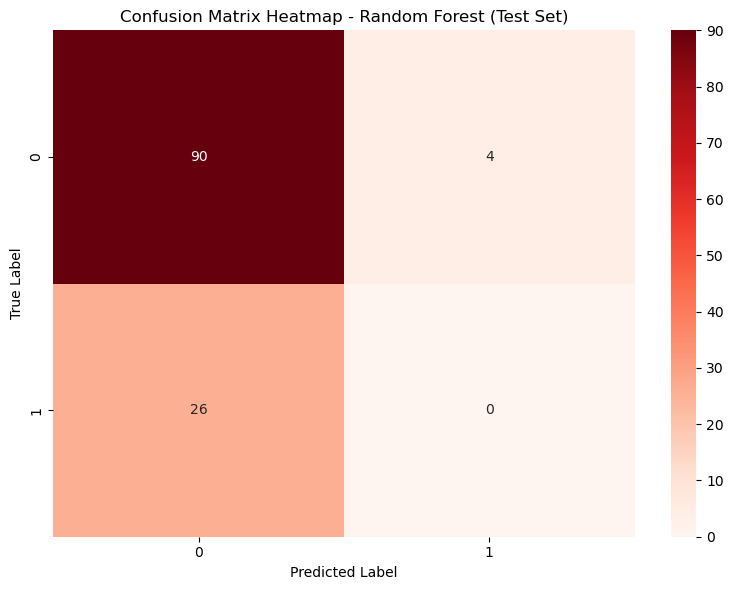

Bagging Accuracy: 0.7666666666666667


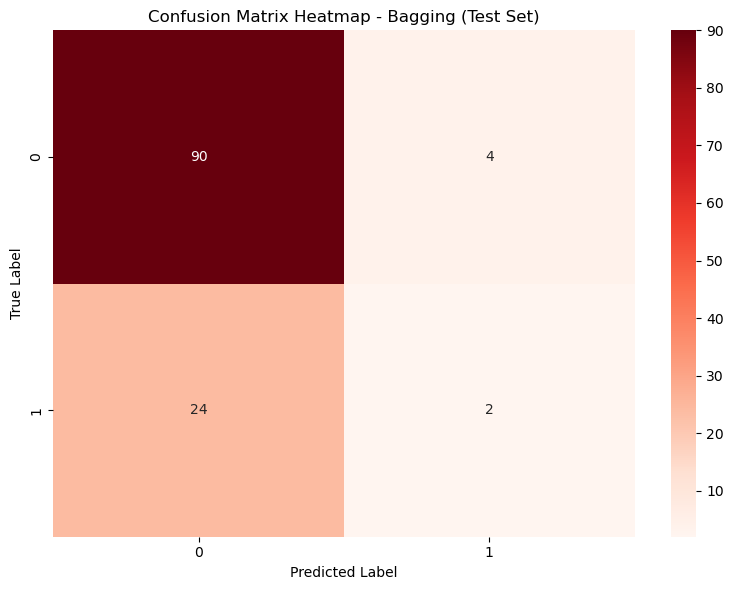

AdaBoost Accuracy: 0.7833333333333333


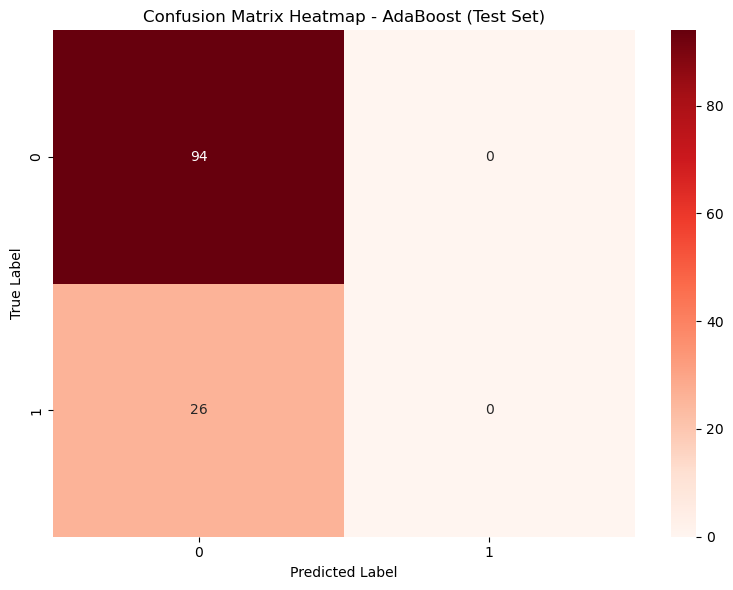

XGBoost Accuracy: 0.7083333333333334


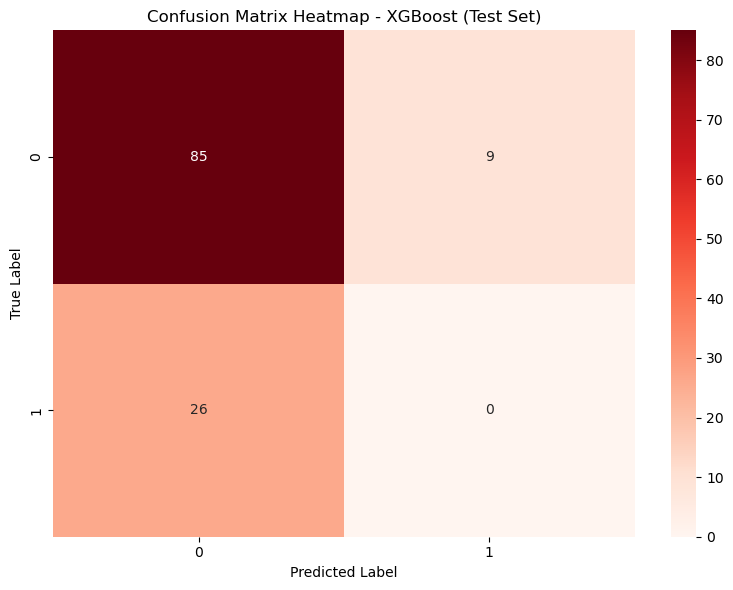

LightGBM Accuracy: 0.7083333333333334


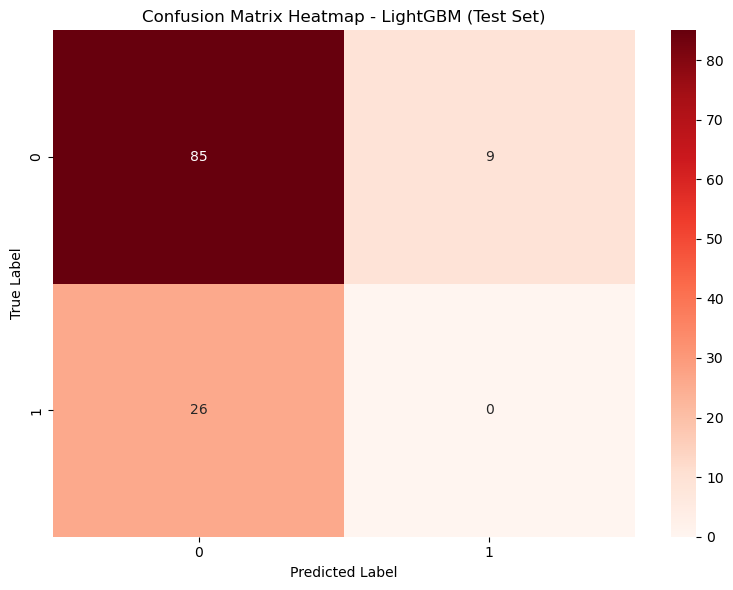

In [89]:
# visualize accuracy for each model
for name, model in zip(model_names, models):
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    
    # Display accuracy
    print(f"{name} Accuracy: {accuracy}")
    
    # Confusion Matrix Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Reds')
    plt.title(f'Confusion Matrix Heatmap - {name} (Test Set)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()